##### Colab

In [1]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install -q kaggle

In [3]:
from google.colab import userdata
import os

os.environ["kaggle_key"] = userdata.get('kaggle_key')
os.environ["kaggle_username"] = userdata.get('kaggle_username')

In [ ]:
!kaggle datasets download -d ravidussilva/real-ai-art
! unzip "real-ai-art"

##### Local & Colab

In [5]:
#Imports
import sys

# Load environment variables from .env file
from dotenv import load_dotenv
load_dotenv()

# Get the project root path from environment variables
project_root = os.getenv('PROJECT_ROOT_PATH') #OR PROJECT_ROOT_PATH_COLAB FOR COLAB

# Check if the environment variable is set correctly
if project_root is None:
    raise ValueError("PROJECT_ROOT_PATH environment variable is not set.")

# Add the project root path to the system path
sys.path.append(project_root)

from scripts.run_cnn import train_model, test_model

from models.resnet18 import ResNet18FineTuned
from scripts.evaluation import analyze_test_results
import torchvision.transforms as transforms

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [6]:
#dataset_path = "/Users/viktoriiaovsianik/Documents/Uni/04_WS2024/06_ADL/Code/ADL-WS-2024/data"
dataset_path = "/content/Real_AI_SD_LD_Dataset"

#### Train & test using transfer learning (ResNet18)

In [7]:
train_transform = transforms.Compose([
        transforms.Resize(size=(32, 32)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

val_transform = transforms.Compose([
        transforms.Resize(size=(32, 32)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(size=(32, 32)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
#freeze_layers=True & freeze_layers = ['conv1', 'bn1', 'layer1', 'layer2'] - what layers need to be frozen
#freeze_layers=False - do not freeze any layers
#freeze_layers=True - freeze all layers except for the last one
freeze_layers = ['conv1', 'bn1', 'layer1', 'layer2']
# Config for training and testing
config = {
    'model': ResNet18FineTuned(freeze_layers=True, specific_layers_to_freeze=freeze_layers),
    'dataset_path': dataset_path,
    'model_save_dir': 'saved_models',
    'results_save_dir': 'saved_results',
    'train_transform': train_transform,
    'val_transform': val_transform,
    'test_transform': test_transform,
    'batch_size': 64,
    'learning_rate': 0.001,
    'scheduler_gamma': 0.9,
    'epochs': 10,
    'fraction': 1,
    'val_frequency': 1,
    'debug_mode': True,
    'patience': 3,
    'model_name': "ResNet18"
}

# Train the model

trainer_resnet = train_model(config)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 160MB/s]


List of parameters that require gradients:
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv2.weight
layer4.0.bn2.weight
layer4.0.bn2.bias
layer4.0.downsample.0.weight
layer4.0.downsample.1.weight
layer4.0.downsample.1.bias
layer4.1.conv1.weight
layer4.1.bn1.weight
layer4.1.bn1.bias
layer4.1.conv2.weight
layer4.1.bn2.weight
layer4.1.bn2.bias
fc.weight
fc.bias
CUDA (GPU) is available.
Preprocessing dataset...
Train dataset length: 90000
Validation dataset length: 10000
Test dataset length: 30000


wandb: Currently logged in as: ovsvc (ovsvc-tu-wien). Use `wandb login --relogin` to force relogin


Model: ResNet18FineTuned(
  (resnet18): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

Training with batch size: 64
Epoch 0/10:
--- Training epoch 0 ---


Train:   0%|          | 1/1407 [00:01<44:12,  1.89s/it]

Batch 0, Loss: 3.1766231060028076


Train:  36%|███▌      | 501/1407 [02:19<04:38,  3.26it/s]

Batch 500, Loss: 1.8335208892822266


Train:  71%|███████   | 1001/1407 [04:38<02:02,  3.30it/s]

Batch 1000, Loss: 1.7043373584747314


Train: 100%|██████████| 1407/1407 [06:30<00:00,  3.61it/s]


Epoch 0 Training Loss: 1.6401598773108588
Training Metrics: Overall Accuracy: 0.4543
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.70
Accuracy for class AI_surrealism: 0.56
Accuracy for class human_art_nouveau: 0.73
Accuracy for class human_expressionism: 0.60
Accuracy for class human_ukiyo_e: 0.51
Accuracy for class AI_renaissance: 0.55
Accuracy for class AI_art_nouveau: 0.55
Accuracy for class human_realism: 0.60
Accuracy for class AI_realism: 0.64
Accuracy for class human_post_impressionism: 0.86
Accuracy for class human_romanticism: 0.28
Accuracy for class AI_expressionism: 0.38
Accuracy for class AI_baroque: 0.11
Accuracy for class AI_impressionism: 0.22
Accuracy for class human_surrealism: 0.20
Accuracy for class human_renaissance: 0.16
Accuracy for class AI_post_impressionism: 0.33
Accuracy for class AI_ukiyo-e: 0.21
Accuracy for class human_impressionism: 0.21
Accuracy for class AI_romanticism: 0.68
--- Validating epoch 0 ---


Evaluate:   1%|          | 1/157 [00:00<00:39,  3.96it/s]

Batch 0, Validation Loss: 1.3642666339874268


Evaluate: 100%|██████████| 157/157 [00:42<00:00,  3.71it/s]


Epoch 0 Validation Loss: 1.3607643013000488
Validation Metrics: Overall Accuracy: 0.5320
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.82
Accuracy for class AI_ukiyo-e: 0.60
Accuracy for class AI_romanticism: 0.87
Accuracy for class AI_art_nouveau: 0.62
Accuracy for class human_surrealism: 0.70
Accuracy for class AI_renaissance: 0.65
Accuracy for class AI_realism: 0.66
Accuracy for class human_ukiyo_e: 0.67
Accuracy for class human_art_nouveau: 0.69
Accuracy for class AI_post_impressionism: 0.95
Accuracy for class human_baroque: 0.32
Accuracy for class human_impressionism: 0.56
Accuracy for class AI_impressionism: 0.16
Accuracy for class human_renaissance: 0.16
Accuracy for class human_expressionism: 0.20
Accuracy for class human_realism: 0.20
Accuracy for class AI_baroque: 0.39
Accuracy for class human_post_impressionism: 0.24
Accuracy for class AI_surrealism: 0.35
Accuracy for class AI_expressionism: 0.83
#### Best accuracy 0.532 at epoch 0
#### Saving model to saved_m

Train:   0%|          | 1/1407 [00:00<06:16,  3.73it/s]

Batch 0, Loss: 1.6676756143569946


Train:  36%|███▌      | 501/1407 [02:19<04:20,  3.47it/s]

Batch 500, Loss: 1.3005520105361938


Train:  71%|███████   | 1001/1407 [04:38<01:51,  3.66it/s]

Batch 1000, Loss: 1.3608511686325073


Train: 100%|██████████| 1407/1407 [06:30<00:00,  3.61it/s]


Epoch 1 Training Loss: 1.2935292871899076
Training Metrics: Overall Accuracy: 0.5537
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.81
Accuracy for class AI_surrealism: 0.70
Accuracy for class human_art_nouveau: 0.82
Accuracy for class human_expressionism: 0.69
Accuracy for class human_ukiyo_e: 0.63
Accuracy for class AI_renaissance: 0.67
Accuracy for class AI_art_nouveau: 0.70
Accuracy for class human_realism: 0.72
Accuracy for class AI_realism: 0.76
Accuracy for class human_post_impressionism: 0.94
Accuracy for class human_romanticism: 0.37
Accuracy for class AI_expressionism: 0.45
Accuracy for class AI_baroque: 0.17
Accuracy for class AI_impressionism: 0.29
Accuracy for class human_surrealism: 0.28
Accuracy for class human_renaissance: 0.22
Accuracy for class AI_post_impressionism: 0.45
Accuracy for class AI_ukiyo-e: 0.26
Accuracy for class human_impressionism: 0.33
Accuracy for class AI_romanticism: 0.81
--- Validating epoch 1 ---


Evaluate:   1%|          | 1/157 [00:00<00:38,  4.07it/s]

Batch 0, Validation Loss: 1.1983059644699097


Evaluate: 100%|██████████| 157/157 [00:42<00:00,  3.67it/s]


Epoch 1 Validation Loss: 1.277968298149109
Validation Metrics: Overall Accuracy: 0.5574
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.79
Accuracy for class AI_ukiyo-e: 0.77
Accuracy for class AI_romanticism: 0.79
Accuracy for class AI_art_nouveau: 0.68
Accuracy for class human_surrealism: 0.66
Accuracy for class AI_renaissance: 0.68
Accuracy for class AI_realism: 0.71
Accuracy for class human_ukiyo_e: 0.73
Accuracy for class human_art_nouveau: 0.76
Accuracy for class AI_post_impressionism: 0.97
Accuracy for class human_baroque: 0.28
Accuracy for class human_impressionism: 0.57
Accuracy for class AI_impressionism: 0.15
Accuracy for class human_renaissance: 0.45
Accuracy for class human_expressionism: 0.24
Accuracy for class human_realism: 0.15
Accuracy for class AI_baroque: 0.38
Accuracy for class human_post_impressionism: 0.22
Accuracy for class AI_surrealism: 0.33
Accuracy for class AI_expressionism: 0.84
#### Best accuracy 0.5574 at epoch 1
#### Saving model to saved_m

Train:   0%|          | 1/1407 [00:00<07:12,  3.25it/s]

Batch 0, Loss: 0.9963674545288086


Train:  36%|███▌      | 501/1407 [02:18<04:22,  3.45it/s]

Batch 500, Loss: 1.1672022342681885


Train:  71%|███████   | 1001/1407 [04:35<01:51,  3.63it/s]

Batch 1000, Loss: 1.1578078269958496


Train: 100%|██████████| 1407/1407 [06:27<00:00,  3.63it/s]


Epoch 2 Training Loss: 1.1651174043019612
Training Metrics: Overall Accuracy: 0.5940
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.84
Accuracy for class AI_surrealism: 0.75
Accuracy for class human_art_nouveau: 0.85
Accuracy for class human_expressionism: 0.72
Accuracy for class human_ukiyo_e: 0.67
Accuracy for class AI_renaissance: 0.72
Accuracy for class AI_art_nouveau: 0.75
Accuracy for class human_realism: 0.76
Accuracy for class AI_realism: 0.80
Accuracy for class human_post_impressionism: 0.95
Accuracy for class human_romanticism: 0.40
Accuracy for class AI_expressionism: 0.50
Accuracy for class AI_baroque: 0.23
Accuracy for class AI_impressionism: 0.32
Accuracy for class human_surrealism: 0.32
Accuracy for class human_renaissance: 0.25
Accuracy for class AI_post_impressionism: 0.50
Accuracy for class AI_ukiyo-e: 0.30
Accuracy for class human_impressionism: 0.39
Accuracy for class AI_romanticism: 0.85
--- Validating epoch 2 ---


Evaluate:   1%|          | 1/157 [00:00<00:37,  4.11it/s]

Batch 0, Validation Loss: 1.1784257888793945


Evaluate: 100%|██████████| 157/157 [00:42<00:00,  3.70it/s]


Epoch 2 Validation Loss: 1.259096495628357
Validation Metrics: Overall Accuracy: 0.5719
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.83
Accuracy for class AI_ukiyo-e: 0.76
Accuracy for class AI_romanticism: 0.83
Accuracy for class AI_art_nouveau: 0.68
Accuracy for class human_surrealism: 0.69
Accuracy for class AI_renaissance: 0.70
Accuracy for class AI_realism: 0.72
Accuracy for class human_ukiyo_e: 0.69
Accuracy for class human_art_nouveau: 0.76
Accuracy for class AI_post_impressionism: 0.95
Accuracy for class human_baroque: 0.36
Accuracy for class human_impressionism: 0.51
Accuracy for class AI_impressionism: 0.18
Accuracy for class human_renaissance: 0.37
Accuracy for class human_expressionism: 0.19
Accuracy for class human_realism: 0.33
Accuracy for class AI_baroque: 0.35
Accuracy for class human_post_impressionism: 0.28
Accuracy for class AI_surrealism: 0.43
Accuracy for class AI_expressionism: 0.83
#### Best accuracy 0.5719 at epoch 2
#### Saving model to saved_m

Train:   0%|          | 1/1407 [00:00<06:49,  3.44it/s]

Batch 0, Loss: 1.1394933462142944


Train:  36%|███▌      | 501/1407 [02:18<03:56,  3.83it/s]

Batch 500, Loss: 0.9974042177200317


Train:  71%|███████   | 1001/1407 [04:35<01:48,  3.73it/s]

Batch 1000, Loss: 0.861339807510376


Train: 100%|██████████| 1407/1407 [06:26<00:00,  3.64it/s]


Epoch 3 Training Loss: 1.06909786851671
Training Metrics: Overall Accuracy: 0.6251
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.86
Accuracy for class AI_surrealism: 0.78
Accuracy for class human_art_nouveau: 0.86
Accuracy for class human_expressionism: 0.74
Accuracy for class human_ukiyo_e: 0.70
Accuracy for class AI_renaissance: 0.76
Accuracy for class AI_art_nouveau: 0.79
Accuracy for class human_realism: 0.80
Accuracy for class AI_realism: 0.83
Accuracy for class human_post_impressionism: 0.96
Accuracy for class human_romanticism: 0.42
Accuracy for class AI_expressionism: 0.53
Accuracy for class AI_baroque: 0.27
Accuracy for class AI_impressionism: 0.35
Accuracy for class human_surrealism: 0.36
Accuracy for class human_renaissance: 0.28
Accuracy for class AI_post_impressionism: 0.55
Accuracy for class AI_ukiyo-e: 0.34
Accuracy for class human_impressionism: 0.44
Accuracy for class AI_romanticism: 0.87
--- Validating epoch 3 ---


Evaluate:   1%|          | 1/157 [00:00<00:52,  2.95it/s]

Batch 0, Validation Loss: 1.096641182899475


Evaluate: 100%|██████████| 157/157 [00:42<00:00,  3.70it/s]


Epoch 3 Validation Loss: 1.270408776473999
Validation Metrics: Overall Accuracy: 0.5641
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.82
Accuracy for class AI_ukiyo-e: 0.64
Accuracy for class AI_romanticism: 0.82
Accuracy for class AI_art_nouveau: 0.64
Accuracy for class human_surrealism: 0.66
Accuracy for class AI_renaissance: 0.72
Accuracy for class AI_realism: 0.77
Accuracy for class human_ukiyo_e: 0.68
Accuracy for class human_art_nouveau: 0.76
Accuracy for class AI_post_impressionism: 0.94
Accuracy for class human_baroque: 0.35
Accuracy for class human_impressionism: 0.56
Accuracy for class AI_impressionism: 0.28
Accuracy for class human_renaissance: 0.35
Accuracy for class human_expressionism: 0.24
Accuracy for class human_realism: 0.16
Accuracy for class AI_baroque: 0.43
Accuracy for class human_post_impressionism: 0.31
Accuracy for class AI_surrealism: 0.30
Accuracy for class AI_expressionism: 0.86
Early stopping counter: 1/3
Epoch 4/10:
--- Training epoch 4 ---


Train:   0%|          | 1/1407 [00:00<07:09,  3.28it/s]

Batch 0, Loss: 0.9756830930709839


Train:  36%|███▌      | 501/1407 [02:19<04:18,  3.50it/s]

Batch 500, Loss: 0.8458916544914246


Train:  71%|███████   | 1001/1407 [04:35<01:49,  3.70it/s]

Batch 1000, Loss: 1.049536108970642


Train: 100%|██████████| 1407/1407 [06:26<00:00,  3.64it/s]


Epoch 4 Training Loss: 0.9775705079290602
Training Metrics: Overall Accuracy: 0.6566
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.89
Accuracy for class AI_surrealism: 0.80
Accuracy for class human_art_nouveau: 0.89
Accuracy for class human_expressionism: 0.77
Accuracy for class human_ukiyo_e: 0.73
Accuracy for class AI_renaissance: 0.80
Accuracy for class AI_art_nouveau: 0.82
Accuracy for class human_realism: 0.82
Accuracy for class AI_realism: 0.86
Accuracy for class human_post_impressionism: 0.97
Accuracy for class human_romanticism: 0.47
Accuracy for class AI_expressionism: 0.58
Accuracy for class AI_baroque: 0.32
Accuracy for class AI_impressionism: 0.38
Accuracy for class human_surrealism: 0.40
Accuracy for class human_renaissance: 0.32
Accuracy for class AI_post_impressionism: 0.59
Accuracy for class AI_ukiyo-e: 0.37
Accuracy for class human_impressionism: 0.48
Accuracy for class AI_romanticism: 0.90
--- Validating epoch 4 ---


Evaluate:   1%|          | 1/157 [00:00<00:40,  3.85it/s]

Batch 0, Validation Loss: 1.2104582786560059


Evaluate: 100%|██████████| 157/157 [00:42<00:00,  3.66it/s]


Epoch 4 Validation Loss: 1.2851428586959839
Validation Metrics: Overall Accuracy: 0.5691
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.79
Accuracy for class AI_ukiyo-e: 0.81
Accuracy for class AI_romanticism: 0.79
Accuracy for class AI_art_nouveau: 0.61
Accuracy for class human_surrealism: 0.73
Accuracy for class AI_renaissance: 0.69
Accuracy for class AI_realism: 0.76
Accuracy for class human_ukiyo_e: 0.66
Accuracy for class human_art_nouveau: 0.76
Accuracy for class AI_post_impressionism: 0.96
Accuracy for class human_baroque: 0.31
Accuracy for class human_impressionism: 0.54
Accuracy for class AI_impressionism: 0.25
Accuracy for class human_renaissance: 0.26
Accuracy for class human_expressionism: 0.32
Accuracy for class human_realism: 0.26
Accuracy for class AI_baroque: 0.42
Accuracy for class human_post_impressionism: 0.25
Accuracy for class AI_surrealism: 0.38
Accuracy for class AI_expressionism: 0.83
Early stopping counter: 2/3
Epoch 5/10:
--- Training epoch 5 ---

Train:   0%|          | 1/1407 [00:00<06:38,  3.53it/s]

Batch 0, Loss: 0.8380401134490967


Train:  36%|███▌      | 501/1407 [02:18<04:03,  3.72it/s]

Batch 500, Loss: 0.8743164539337158


Train:  71%|███████   | 1001/1407 [04:36<01:49,  3.71it/s]

Batch 1000, Loss: 0.9679166078567505


Train: 100%|██████████| 1407/1407 [06:28<00:00,  3.62it/s]


Epoch 5 Training Loss: 0.8993878848393758
Training Metrics: Overall Accuracy: 0.6842
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.89
Accuracy for class AI_surrealism: 0.83
Accuracy for class human_art_nouveau: 0.89
Accuracy for class human_expressionism: 0.80
Accuracy for class human_ukiyo_e: 0.76
Accuracy for class AI_renaissance: 0.82
Accuracy for class AI_art_nouveau: 0.83
Accuracy for class human_realism: 0.85
Accuracy for class AI_realism: 0.88
Accuracy for class human_post_impressionism: 0.97
Accuracy for class human_romanticism: 0.51
Accuracy for class AI_expressionism: 0.62
Accuracy for class AI_baroque: 0.38
Accuracy for class AI_impressionism: 0.41
Accuracy for class human_surrealism: 0.43
Accuracy for class human_renaissance: 0.37
Accuracy for class AI_post_impressionism: 0.61
Accuracy for class AI_ukiyo-e: 0.40
Accuracy for class human_impressionism: 0.54
Accuracy for class AI_romanticism: 0.90
--- Validating epoch 5 ---


Evaluate:   1%|          | 1/157 [00:00<00:38,  4.08it/s]

Batch 0, Validation Loss: 1.1490060091018677


Evaluate: 100%|██████████| 157/157 [00:43<00:00,  3.64it/s]


Epoch 5 Validation Loss: 1.3034244819641114
Validation Metrics: Overall Accuracy: 0.5739
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.86
Accuracy for class AI_ukiyo-e: 0.71
Accuracy for class AI_romanticism: 0.87
Accuracy for class AI_art_nouveau: 0.58
Accuracy for class human_surrealism: 0.71
Accuracy for class AI_renaissance: 0.69
Accuracy for class AI_realism: 0.74
Accuracy for class human_ukiyo_e: 0.71
Accuracy for class human_art_nouveau: 0.77
Accuracy for class AI_post_impressionism: 0.97
Accuracy for class human_baroque: 0.26
Accuracy for class human_impressionism: 0.51
Accuracy for class AI_impressionism: 0.20
Accuracy for class human_renaissance: 0.39
Accuracy for class human_expressionism: 0.28
Accuracy for class human_realism: 0.16
Accuracy for class AI_baroque: 0.50
Accuracy for class human_post_impressionism: 0.34
Accuracy for class AI_surrealism: 0.37
Accuracy for class AI_expressionism: 0.85
Early stopping counter: 3/3
Early stopping triggered.


epoch,▁▃▅▆█
train/acc,▁▄▆▇█
train/loss,█▄▃▂▁
val/acc,▁▅█▇█
val/loss,█▂▁▂▃
epoch,4
train/acc,0.65657
train/loss,0.97757
val/acc,0.5691
val/loss,1.28514


In [8]:
# Test the model (reuse the trainer)
test_loss, test_accuracy, test_per_class_accuracy, all_labels, all_predictions, test_classes = test_model(config, trainer=None)

CUDA (GPU) is available.
Preprocessing dataset...
Train dataset length: 90000
Validation dataset length: 10000
Test dataset length: 30000
Model: ResNet18FineTuned(
  (resnet18): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): 

Testing the model...


/content/drive/MyDrive/06_TUWien/10_ADL/scripts/run_cnn.py:173: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trainer.model.load_state_dict(torch.load(Path(config['model_sav

Test: 100%|██████████| 469/469 [02:23<00:00,  3.27it/s]

Test Metrics: Overall Accuracy: 0.6336
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.85
Accuracy for class AI_expressionism: 0.78
Accuracy for class AI_baroque: 0.82
Accuracy for class AI_ukiyo-e: 0.68
Accuracy for class human_renaissance: 0.69
Accuracy for class human_post_impressionism: 0.72
Accuracy for class human_realism: 0.69
Accuracy for class AI_art_nouveau: 0.71
Accuracy for class AI_romanticism: 0.77
Accuracy for class AI_renaissance: 0.95
Accuracy for class human_expressionism: 0.38
Accuracy for class AI_impressionism: 0.47
Accuracy for class AI_post_impressionism: 0.19
Accuracy for class human_baroque: 0.31
Accuracy for class AI_surrealism: 0.18
Accuracy for class human_impressionism: 0.31
Accuracy for class AI_realism: 0.32
Accuracy for class human_surrealism: 0.30
Accuracy for class human_art_nouveau: 0.44
Accuracy for class human_ukiyo_e: 0.81


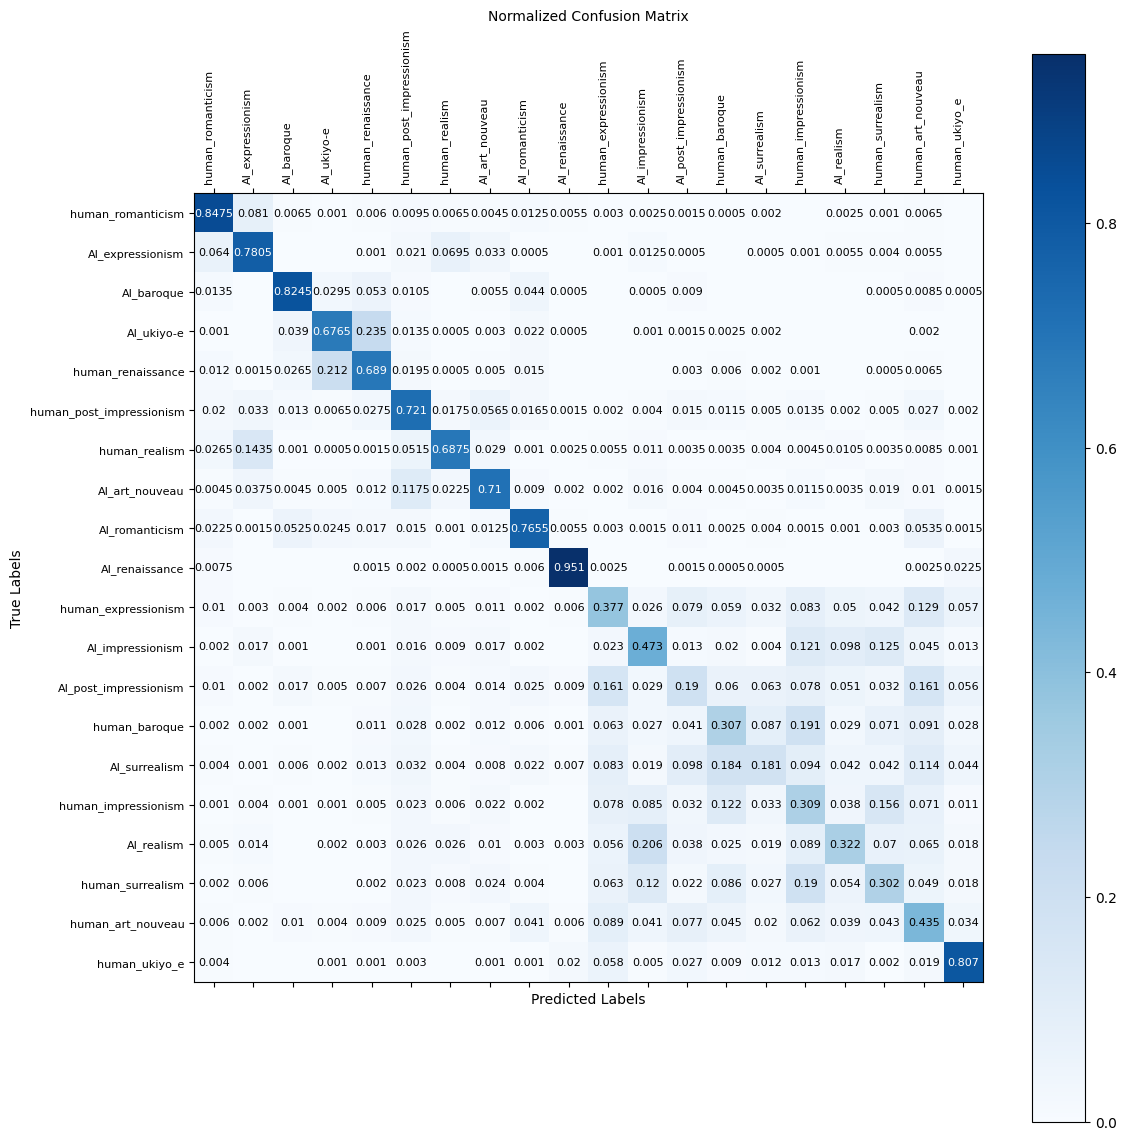


Classification Report:
                          precision    recall  f1-score   support

       human_romanticism       0.81      0.85      0.83      2000
        AI_expressionism       0.71      0.78      0.74      2000
              AI_baroque       0.83      0.82      0.83      2000
              AI_ukiyo-e       0.70      0.68      0.69      2000
       human_renaissance       0.64      0.69      0.66      2000
human_post_impressionism       0.66      0.72      0.69      2000
           human_realism       0.82      0.69      0.75      2000
          AI_art_nouveau       0.77      0.71      0.74      2000
          AI_romanticism       0.81      0.77      0.79      2000
          AI_renaissance       0.96      0.95      0.95      2000
     human_expressionism       0.35      0.38      0.36      1000
        AI_impressionism       0.42      0.47      0.44      1000
   AI_post_impressionism       0.26      0.19      0.22      1000
           human_baroque       0.31      0.31      

In [9]:
# Analyze test results
metrics = analyze_test_results(
    test_loss=test_loss,
    test_accuracy=test_accuracy,
    test_per_class_accuracy=test_per_class_accuracy,
    all_labels=all_labels,
    all_predictions=all_predictions,
    classes=test_classes
)